## Let's get started

In [1]:
from pprint import pprint

Import neccessary python libraries for working with data and statistics

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import numpy as np
import pandas as pd
from scipy import stats as st
#import seaborn as sns

Load datasets

In [ ]:
reds = pd.read_csv('./data/wineQualityReds.csv', index_col=0)
whites = pd.read_csv('./data/wineQualityWhites.csv', index_col=0)

Description of the data can be found [here](https://github.com/ludgo/udaWine/blob/master/data/Redirecting.txt). We are particularly interested in column decriptions:

Input variables (based on physicochemical tests):
   1. fixed acidity (tartaric acid - g / dm^3)
   2. volatile acidity (acetic acid - g / dm^3)
   3. citric acid (g / dm^3)
   4. residual sugar (g / dm^3)
   5. chlorides (sodium chloride - g / dm^3
   6. free sulfur dioxide (mg / dm^3)
   7. total sulfur dioxide (mg / dm^3)
   8. density (g / cm^3)
   9. pH
   10. sulphates (potassium sulphate - g / dm3)
   11. alcohol (% by volume)
Output variable (based on sensory data): 
   12. quality (score between 0 and 10)

To get intuition about data available, we look at some examples

In [ ]:
redsSnippet = reds.head()
whitesSnippet = whites.head()

print('Red wines')
print(redsSnippet)
print()
print('White wines')
print(whitesSnippet)

We possess information that both datasets are polished and contain same parameters. That's why we can also join them. Notice that the number of white wines is disproportional to the number of red wines

In [153]:
wines = pd.concat([reds,whites], ignore_index=True)
wines.to_csv('./data/wineQuality.csv')

## Basic statistics

We choose the quality column of integers. Then we can perform basic statistic operations

In [154]:
print('Wine quality')
print()

minimum = wines['quality'].min()
print('Worst: {}'.format(minimum))

maximum = wines['quality'].max()
print('Best: {}'.format(maximum))

mean = wines['quality'].mean()
print('Average: {}'.format(mean))

median = wines['quality'].median()
print('Middle: {}'.format(median))

mode = wines['quality'].mode()
print('Most frequent: {}'.format(mode.values))

Wine quality

Worst: 3
Best: 9
Average: 5.818377712790519
Middle: 6.0
Most frequent: [6]


We could continue, looking at concrete quartiles etc. ... However there is a built-in pandas' function to help us

In [155]:
print('All wines')
print(wines.describe())

All wines
       fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.00000

## Normal distribution

Following part works with red wines only.

We have alredy seen an example of sample standard deviation before. Now we continue with density

In [156]:
std = reds['density'].std()
print(std)

0.0018873339538425563


Imagine that the wines taking part at the competition would be all existing wines in the world. Thus they would be the entire population and we could calculate population standard deviation

In [157]:
popstd = reds['density'].std(ddof=0)
print(popstd)

0.0018867437008323923


This is certainly not true because we know that we did not collected all wines from all over the world. As often, visualization might be helpful. We have about 1600 red wines so that **sqrt(1600) = 40** will be number of bins

(array([   3.,    2.,    2.,    1.,    7.,    4.,    9.,    7.,    8.,
          23.,   33.,   26.,   33.,   50.,   69.,   98.,  102.,  101.,
         146.,  138.,  142.,  110.,  110.,   86.,   45.,   63.,   33.,
          44.,   23.,   31.,   17.,    3.,    6.,    8.,    1.,    4.,
           4.,    1.,    4.,    2.]),
 array([ 0.99007  ,  0.9904105,  0.990751 ,  0.9910915,  0.991432 ,
         0.9917725,  0.992113 ,  0.9924535,  0.992794 ,  0.9931345,
         0.993475 ,  0.9938155,  0.994156 ,  0.9944965,  0.994837 ,
         0.9951775,  0.995518 ,  0.9958585,  0.996199 ,  0.9965395,
         0.99688  ,  0.9972205,  0.997561 ,  0.9979015,  0.998242 ,
         0.9985825,  0.998923 ,  0.9992635,  0.999604 ,  0.9999445,
         1.000285 ,  1.0006255,  1.000966 ,  1.0013065,  1.001647 ,
         1.0019875,  1.002328 ,  1.0026685,  1.003009 ,  1.0033495,  1.00369  ]),
 <a list of 40 Patch objects>)

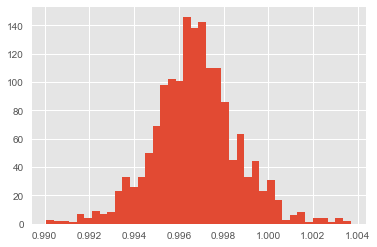

In [158]:
plt.hist(reds['density'], bins=40)

Seems that the density falls into normal distrubution. If we calculate z-scores for values we can model standard normal distribution and plot is as follows

(array([ 0.01039606,  0.0069307 ,  0.0069307 ,  0.00346535,  0.02425746,
         0.01386141,  0.03118817,  0.02425746,  0.02772281,  0.07970309,
         0.11435661,  0.09009915,  0.11435661,  0.17326759,  0.23910927,
         0.33960448,  0.35346588,  0.35000053,  0.50594136,  0.47821855,
         0.49207995,  0.3811887 ,  0.3811887 ,  0.29802025,  0.15594083,
         0.21831716,  0.11435661,  0.15247548,  0.07970309,  0.10742591,
         0.05891098,  0.01039606,  0.02079211,  0.02772281,  0.00346535,
         0.01386141,  0.01386141,  0.00346535,  0.01386141,  0.0069307 ]),
 array([-3.5387314 , -3.35826174, -3.17779207, -2.99732241, -2.81685275,
        -2.63638308, -2.45591342, -2.27544376, -2.09497409, -1.91450443,
        -1.73403477, -1.5535651 , -1.37309544, -1.19262578, -1.01215612,
        -0.83168645, -0.65121679, -0.47074713, -0.29027746, -0.1098078 ,
         0.07066186,  0.25113153,  0.43160119,  0.61207085,  0.79254052,
         0.97301018,  1.15347984,  1.3339495 ,  1

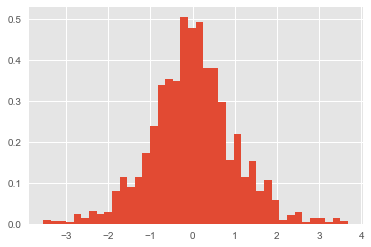

In [159]:
normDensity = st.zscore(reds['density'])
plt.hist(normDensity, bins=40, normed=1)

Ok. If density does really copy normal distribution, we can ask different questions

In [172]:
for i in [.8, .9, .95, .99]:
    print('How many red wines at competition are at top {}% ?'.format(100-int(100*i)))
    pvalue = st.norm.ppf(i)
    print(len(normDensity[normDensity > pvalue]))

How many red wines at competition are at top 20% ?
277
How many red wines at competition are at top 10% ?
158
How many red wines at competition are at top 5% ?
82
How many red wines at competition are at top 1% ?
24


## Z - test